<a href="https://colab.research.google.com/github/visiont3lab/tecnologie_data_science/blob/master/book/docs/unsupervised/pca_regressione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA: Regressione

# Cosa andremo a fare oggi?
  * Creazione di un dataset usando la libreria pandas. Come passare da numpy array to pandas dataframe
  * Scikit-Learn datasets Spiegazione, nozioni su come scaricarli applicazione della regressione lineare a un dataset di scikit-learn (diabetes dataset)
  * Cosa significa correlazione? Quando e perchè si utilizza
  * Principal Component Analysis (PCA) dimensionality reduction
    * Riduzione del numero di input a un numero fisso (es. 2)
    * Come facciamo a riddure il numero degli input senza ridurre il contenuto di informazioni del nostro dataset iniziale? 
  * Esempio pratico: Regressione lineare applicata a un dataset con e senza PCA.

# Creazione di un dataset usando la libreria pandas
In questo paragrafo andiamo a vedere come creare una classe dataset usando sia numpy che pandas in modo che possiamo facilmente applicare le regressioni studiate a questo. Inoltre vedremo come utilizare i dataset di scikit-learn.



In [0]:
'''
Y = Salario al mese in euro
X1 = Età del lavoratore
X2 = Numero di ore mensili di lavoro
X3 = Indice di esperienza da 1 a 10
Equazione = Y = w0 + w1*X1 + w2*X2 + w3*X3
1) Marco:    Y=1100   X1=19   X2=150   X3=6    Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*19 + w2*150 + w3*6
2) Daniele:  Y=1150   X1=21   X2=135   X3=8    Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*21 + w2*135 + w3*8
3) Davide:   Y=1155   X1=22   X2=160   X3=5    Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*22 + w2*160 + w3*5 
4) Marta:    Y=1170   X1=23   X2=158   X3=7    Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*23 + w2*158 + w3*7
6) Alessia:  Y=1200   X1=26   X2=155   X3=7    Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*26 + w2*155 + w3*7
9) Stella:   Y=1750   X1=33   X2=120   X3=10   Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*33 + w2*120 + w3*10
10) Chiara   Y=1640   X1=29   X2=130   x3=9    Y= w0*1 + w1*X1 + w2*X2 + w3*X3 --> 1100 = w0*1 + w1*29 + w2*130 + w3*9
'''

import pandas as pd
class Dataset():
    def __init__(self):
      self.X = np.array([[19,150,6],[21,135,8], [22,160,5], [23,158,7], [26,155,7], [33,120,10],[29,130,9]])
      self.Y = np.array([[1100],[1150],[1155],[1170],[1200],[1750],[1640]])
    def createPandasDataset(self):
        df_X = pd.DataFrame(data=self.X, columns =["età","ore mensili", "esperienza"])
        df_Y = pd.DataFrame(data=self.Y, columns =["salario"])
        return df_X, df_Y

myDataset = Dataset()
df_X, df_Y = myDataset.createPandasDataset()
display(df_X)
display(df_Y)

      

,età,ore mensili,esperienza
0,19,150,6
1,21,135,8
2,22,160,5
3,23,158,7
4,26,155,7
5,33,120,10
6,29,130,9


,solario
0,1100
1,1150
2,1155
3,1170
4,1200
5,1750
6,1640


# Scikit-Learn datasets spiegazione e  nozioni su come scaricarli.

Andremo a vedere quali dataset sono disponibili in scikit-learn, come scaricarli e capirne il contenuto.

* [Sklearn dataset page](https://scikit-learn.org/stable/datasets/index.html#datasets)

I dataset disponibili sono i seguenti: 
  * Regressione:
      * [Boston houses price dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)
      * [Diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)
      * [Linnerrud Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud)
  * Classificazione:
    * [Iris plant dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
    * [Optical recognition of handwritten digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)  
    * [Wine Recognition dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)
    * [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

Implementazione di una classe capace di scaricare i dati da scikit-learn, visualizzarli e analizzarli.

In [0]:
# Importare i datasets
from sklearn import datasets
import pandas as pd

class ScikitLearnDatasets:
  def __init__(self, dataset_name):
    # Load all scikit-learn dataset
    if ("iris"==dataset_name):
      self.dataset_scelto = datasets.load_iris() # Classificazione iris dataset
    elif ("digits"==dataset_name):
      self.dataset_scelto = datasets.load_digits() # Classificazione Load digits dataset
    elif ("wine"==dataset_name):
      self.dataset_scelto = datasets.load_wine() # Classificazione Load wine dataset
    elif ("breast_cancer"==dataset_name):
      self.dataset_scelto = datasets.load_breast_cancer() # Classificazione Load breast_cancer dataset
    elif ("boston"==dataset_name):
      self.dataset_scelto = datasets.load_boston() # Regressione Load boston dataset
      self.dataset_scelto.update([ ('target_names', ['Boston-House-Price'])] )
    elif ("diabetes"==dataset_name):
      self.dataset_scelto = datasets.load_diabetes() # Regressione Load diabetes dataset
      self.dataset_scelto.update([ ('target_names', ['Desease-Progression'])] )
    elif ("linnerud"==dataset_name):
      self.dataset_scelto = datasets.load_linnerud() # Regressione Load linnerud dataset
    else:
      self.dataset_scelto = diabetes # Regressione default choice
    
    # Print dataset information
    self.printDatasetInformation()

  def printDatasetInformation(self):
    #print(dataset_scelto)
    parametri = self.dataset_scelto.keys()
    valore = self.dataset_scelto.values()
    print(parametri)
    # Print useful information
    for name in parametri:
      print("------------------------------------------")
      print(name , self.dataset_scelto[name])
      print("------------------------------------------")

  def getXY(self):
    # Get Input (X) Data
    X = self.dataset_scelto['data'] # or  data = iris.get('data')
    X_names = self.dataset_scelto['feature_names']
    
    # Get Output (Y) Target
    parametri = self.dataset_scelto.keys()
    Y = self.dataset_scelto['target']
    Y_names = self.dataset_scelto['target_names']
    
    print("Dataset Parameters: ", parametri)
    print("Feature Names: ", X_names)
    print("Output Names: ", Y_names)
    print("Input X Shape: " , X.shape)
    print("Output Y Shape: " , Y.shape)
    
    return X,Y,X_names,Y_names
          
  def createPandasDataFrame(self,X,Y,X_names,Y_names,dataset_name):
    df_X = pd.DataFrame(data=X, columns =X_names)
    df_Y = pd.DataFrame(data=Y, columns =Y_names)
    return df_X, df_Y

  def writeDataFrameToCsv(self,df_X,df_Y):
    # Create csv file
    df_X.to_csv(dataset_name + '_X.csv', sep = ',', index = False)
    df_Y.to_csv(dataset_name + '_Y.csv', sep = ',', index = False)
    
# Choose the dataset
# Regressione: "boston", "diabetes",
# Classificazione: "iris", "digits", "wine", "breast_cancer "
# Regressione: "diabetes", "boston", "linnerud"
dataset_name = "diabetes"
myScikitLearnDatasets=ScikitLearnDatasets(dataset_name)
X,Y,X_names,Y_names = myScikitLearnDatasets.getXY()
df_X,df_Y = myScikitLearnDatasets.createPandasDataFrame(X,Y,X_names,Y_names,dataset_name)
myScikitLearnDatasets.writeDataFrameToCsv(df_X,df_Y)

display(df_X)
display(df_Y)


dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'target_names'])
------------------------------------------
data [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
------------------------------------------
------------------------------------------
target [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


,Desease-Progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


# Cosa significa correlazione?
Andiamo a vedere come si interpreta la matrice di correlazione.
Rispondiamo alla domanda:
<center><h3> Come deve essere la matrice di correlazione?</h3> <center>
La correlazione esprime quanto due feature (esempio età e sesso) sono simili tra loro. Al fine di avere un dataset utile alla nostra regressione lineare è necessario che non vi sia troppa correlazione tra i dati. Se ciò accadesse significherebbe che stiamo usando diverse volte informazioni molto simili per risolvere un problema.

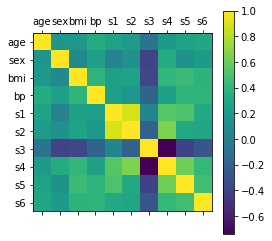

In [0]:
import matplotlib.pyplot as plt
# Correlation Matrix
plt.matshow(df_X.corr())
plt.xticks(range(len(df_X.columns)), df_X.columns)
plt.yticks(range(len(df_X.columns)), df_X.columns)
plt.colorbar()
plt.show()

In [0]:
df_X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1,0.17,0.19,0.34,0.26,0.22,-0.075,0.2,0.27,0.3
sex,0.17,1,0.088,0.24,0.035,0.14,-0.38,0.33,0.15,0.21
bmi,0.19,0.088,1,0.4,0.25,0.26,-0.37,0.41,0.45,0.39
bp,0.34,0.24,0.4,1,0.24,0.19,-0.18,0.26,0.39,0.39
s1,0.26,0.035,0.25,0.24,1,0.9,0.052,0.54,0.52,0.33
s2,0.22,0.14,0.26,0.19,0.9,1,-0.2,0.66,0.32,0.29
s3,-0.075,-0.38,-0.37,-0.18,0.052,-0.2,1,-0.74,-0.4,-0.27
s4,0.2,0.33,0.41,0.26,0.54,0.66,-0.74,1,0.62,0.42
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.4,0.62,1,0.46
s6,0.3,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1


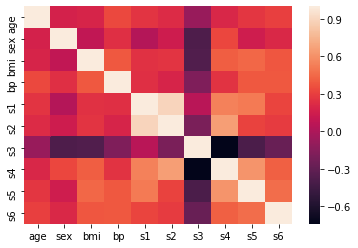

In [0]:
import seaborn as sns
corr = df_X.corr()
sns.heatmap(corr,  xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# Dimensionality Reduction (Principal Component Analysis PCA)
Nel caso vi sia una situazione in cui la correlazione tra le features è molto alta possiamo sia manualmente rimuovere le feature che consideriamo superflue oppure utilizzare la PCA. Quest'ultima si occupa di creare nuove features (se prima ne avevamo 10 adesso ne avremo un numero minore) che non hanno un significato fisico ma che sono sufficienti a rappresentare il nostro dataset. In poche parole semplichiamo gli input (features) al minimo numero necessario. Questò fara si che tra gli input vi sia pochissima correlazione in quanto ogni input features avrà un valore diverso dalle altre.

IMPORTANTE: Il calcolo della principal componet analysis (PCA) è fortemente influenzato dalla scala. Quindi è necesseria avere per tutti gli input (features ) una scala comune.

Standardizzare i dati significarli ricondurli a una scala il cui mean=0 e la variance=1.



In [0]:
from sklearn.preprocessing import StandardScaler
features = X_names
# Separating out the features
x = df_X
# Separating out the target
y = df_Y
# Standardizing the features
x = StandardScaler().fit_transform(x)
df_X_Standard = pd.DataFrame(data = x , columns = X_names)
display(df_X)
display(df_X_Standard)
df_X.keys()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256044,-0.119769,-0.053957,-0.602843,-0.054499,0.655795,0.151508
438,-0.115937,1.065488,-0.334410,-1.422098,1.037341,1.664355,-0.602843,0.721302,-0.380915,0.935254
439,0.876870,1.065488,-0.334410,0.363330,-0.785107,-0.290965,-0.525441,-0.232934,-0.985585,0.325674
440,-0.956004,-0.938537,0.821235,0.025547,0.343075,0.321306,-0.602843,0.558384,0.936155,-0.545154


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Riduciamo il numero delle features (input) a 2 usando la PCA


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
display(principalDf)

# Varianza associata ad ogni componente
pca.explained_variance_ratio_


,principal component 1,principal component 2
0,0.587208,-1.946828
1,-2.831612,1.372085
2,0.272148,-1.634898
3,0.049310,0.382253
4,-0.756451,0.811968
...,...,...
437,1.239531,-1.035955
438,1.264676,0.761301
439,-0.205246,-1.205446
440,0.692866,0.210117


array([0.40242142, 0.14923182])

Dobbiamo capire il levello di informazione di ogni singola componente trovata. Quando riduciamo la dimensionalità perdiamo delle informazioni in quanto il numero di input è stato ridotto. Vogliamo chiederci adesso le componenti 1 e 2 quanta informazione contengono? La compomente 1 contiene il 40% della varianza mentre la componete 2 il 14 %. Insieme essi contengono il 54% della varianza. Cioè significa che rispetto alle informazioni iniziali abbiamo perso il 46%.

## Come facciamo a riddure il numero degli input senza ridurre il contenuto di informazioni del nostro dataset iniziale?
Mantenere esattamente il 100 % delle informazioni è impossibile. Pertanto ridurremo di poco il contenuto delle informazioni (es. 90%). Questo ci permetterà di ridurre il numero di input ed avere allo stesso tempo un predizione ottima.



In [0]:
from sklearn.decomposition import PCA
# If 0 < n_components < 1 and svd_solver == 'full', select the number of 
# components such that the amount of variance that needs to be explained 
# is greater than the percentage specified by n_components.
pca = PCA(n_components=0.90)
x = df_X.values
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)

row_number = principalComponents.shape[1]
X_names_new = []
for i in range(0,row_number): 
  name = "component_" + str(i)
  X_names_new.append(name)


principalDf = pd.DataFrame(data = principalComponents ,columns=X_names_new)
display(principalDf)

# Varianza associata ad ogni componente
variance_arr = pca.explained_variance_ratio_
tot_variance = 0
for variance in variance_arr:
  temp_variance = variance*100
  tot_variance += temp_variance
print(tot_variance)

,component_0,component_1,component_2,component_3,component_4,component_5,component_6
0,0.587208,-1.946828,0.589233,-0.082812,-0.256630,-1.011214,-0.179807
1,-2.831612,1.372085,0.027915,-0.469999,-0.143229,-1.013015,0.224414
2,0.272148,-1.634898,0.739270,-0.791475,-1.163821,-1.112806,-0.462406
3,0.049310,0.382253,-2.013037,1.373239,0.255528,0.445315,0.482147
4,-0.756451,0.811968,-0.057259,-0.137520,-0.133344,-0.814591,0.436451
...,...,...,...,...,...,...,...
437,1.239531,-1.035955,0.928691,-0.656266,0.204315,-0.479371,0.394431
438,1.264676,0.761301,-1.750210,-1.133482,-0.094014,0.973430,-1.173570
439,-0.205246,-1.205446,0.496078,-1.353349,-0.141686,-0.045289,-0.635451
440,0.692866,0.210117,-0.868730,1.616790,0.119649,-0.556900,0.545703


94.79436357350414


# Esempio Pratico
1. Scarichiamo il boston dataset
2. Dividiamo i dati in training e test
3. Applichiamo la PCA
4. Compariamo la predizione di un Regressore Lineare con e senza pca 

In [0]:
  from sklearn.preprocessing import StandardScaler
  from sklearn.decomposition import PCA
  import pandas as pd
  import matplotlib.pyplot as plt
  import numpy as np
  from sklearn import datasets
  import os
  from sklearn import linear_model
  from sklearn.metrics import mean_squared_error
  from sklearn.model_selection import train_test_split
  plt.rcParams['figure.figsize'] = [15, 10]

  # FUNCTION: Standard data with 0 mean and unit variance (Gaussian)
  def standardScaler(df):
      # Input pandas dataframe Output pandas dataframe scaled
      names = list(df.keys())
      data = df.values
      data_scaled = StandardScaler().fit_transform(data)
      df_scaled = pd.DataFrame(data = data_scaled , columns=names)
      #print(df)
      #print(df_scaled)
      return df_scaled

  # FUNCTION: Create pandas dataframe from numpy array
  def createPandasDataFrame(X,Y,X_names,Y_names):
    df_X = pd.DataFrame(data=X, columns =X_names)
    df_Y = pd.DataFrame(data=Y, columns =Y_names)
    return df_X, df_Y

  # FUNCTION: Write pandas dataframe to csv file
  def writeDataFrameToCsv(df_X,df_Y,directory_path,dataset_name):
    if not os.path.exists(directory_path):
      os.makedirs(directory_path)
    
    # Create csv file
    path_write = os.path.join(directory_path, dataset_name)
    df_X.to_csv(path_write + '_X.csv', sep = ',', index = False)
    df_Y.to_csv(path_write + '_Y.csv', sep = ',', index = False)

  # FUNCTION: Read from csv file a dataset
  def readDataFrameFromCsv(directory_path, dataset_name):
    path_read = os.path.join(directory_path, dataset_name)
    if not os.path.exists(directory_path):
      print("Directory path does not exist")
    df_X = pd.read_csv(path_read + '_X.csv') 
    df_Y = pd.read_csv(path_read + '_Y.csv') 
    return df_X, df_Y  

  # CLASS: PCA class to do input dimensionality reduction
  class dimensionalityReduction():

      def __init__(self,n_components): 
          # define pca
          self.pca = PCA(n_components)
          
      def create_names(self,col_number):
          names = []
          for i in range(0,col_number): 
              name = "component_" + str(i)
              names.append(name)
          return names

      def fit(self,df):
          df_scaled = standardScaler(df)
          model = self.pca.fit(df_scaled.values)
          information_array = model.explained_variance_ratio_ *100.00
          total_information = np.sum(information_array)
          return model,information_array, total_information

      def transform(self, model,df):  
          # Input dataframe
          principalComponents = model.transform(df.values)
          names = self.create_names(col_number=principalComponents.shape[1])
          df_scaled = pd.DataFrame(data = principalComponents , columns = names)
          return df_scaled

  # CLASS: Easily import different datasets
  class ScikitLearnDatasets():
    
    def __init__(self, dataset_name):
      # Load all scikit-learn dataset
      if ("iris"==dataset_name):
        self.dataset_scelto = datasets.load_iris() # Classificazione iris dataset
      elif ("digits"==dataset_name):
        self.dataset_scelto = datasets.load_digits() # Classificazione Load digits dataset
      elif ("wine"==dataset_name):
        self.dataset_scelto = datasets.load_wine() # Classificazione Load wine dataset
      elif ("breast_cancer"==dataset_name):
        self.dataset_scelto = datasets.load_breast_cancer() # Classificazione Load breast_cancer dataset
      elif ("boston"==dataset_name):
        self.dataset_scelto = datasets.load_boston() # Regressione Load boston dataset
        self.dataset_scelto.update([ ('target_names', ['Boston-House-Price'])] )
      elif ("diabetes"==dataset_name):
        self.dataset_scelto = datasets.load_diabetes() # Regressione Load diabetes dataset
        self.dataset_scelto.update([ ('target_names', ['Desease-Progression'])] )
      elif ("linnerud"==dataset_name):
        self.dataset_scelto = datasets.load_linnerud() # Regressione Load linnerud dataset
      else:
        self.dataset_scelto = "diabetes" # Regressione default choice
      
      # Print dataset information
      #self.printDatasetInformation()

    def printDatasetInformation(self):
      #print(dataset_scelto)
      parameters = self.dataset_scelto.keys()
      data = self.dataset_scelto.values()
      #print(parameters)
      # Print useful information
      for name in parameters:
        print("------------------------------------------")
        print(name , self.dataset_scelto[name])
        print("------------------------------------------")

    def getXY(self):
      # Get Input (X) Data
      X = self.dataset_scelto['data'] # or  data = iris.get('data')
      X_names = self.dataset_scelto['feature_names']
      
      # Get Output (Y) Target
      parameters = self.dataset_scelto.keys()
      Y = self.dataset_scelto['target']
      Y_names = self.dataset_scelto['target_names']
      
      return X,Y,X_names,Y_names
            
  # CLASS: Linar Regression          
  class LinearRegression(): 

      def __init__(self):
        # Inizializzazione
        # https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification
        self.model = linear_model.LinearRegression(fit_intercept=True, normalize=False)
        
      def train(self,X,Y):
        # Stimare w0, w1 .. wN
        trained_model = self.model.fit(X,Y)
        #print("w1,w2 .. wN : ",self.model.coef_)
        #print("w0 : ", self.model.intercept_) 
        return trained_model
      
      def predict(self,X_test,trained_model):
        Y_pred = trained_model.predict(X_test)
        return Y_pred
      
      def evaluate(self,X_test, Y_test, trained_model):
        # R2 score
        Y_pred = trained_model.predict(X_test)
        R2_score = trained_model.score(X_test, Y_test)
        RMSE_score = (np.sqrt(mean_squared_error(Y_test, Y_pred)))
        return Y_pred,R2_score, RMSE_score

      def plot(self,Y_test,Y_pred):
          length = Y_pred.shape[0] # 20
          index_bar = np.linspace(0,length,length)
          plt.plot(index_bar, Y_test, label='Test')
          plt.plot(index_bar, Y_pred, label='Prediction')
          plt.legend()
          plt.show()


#---------- DATASET INFORMATION ------------#
X Input or feature_names:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Y Output or target_names:  ['Desease-Progression']
Input X Shape:  (442, 10)
Output Y Shape:  (442,)
Dataframe df_X Input Describe: 
                 age           sex  ...            s5            s6
count  4.420000e+02  4.420000e+02  ...  4.420000e+02  4.420000e+02
mean  -3.634285e-16  1.308343e-16  ... -3.830854e-16 -3.412882e-16
std    4.761905e-02  4.761905e-02  ...  4.761905e-02  4.761905e-02
min   -1.072256e-01 -4.464164e-02  ... -1.260974e-01 -1.377672e-01
25%   -3.729927e-02 -4.464164e-02  ... -3.324879e-02 -3.317903e-02
50%    5.383060e-03 -4.464164e-02  ... -1.947634e-03 -1.077698e-03
75%    3.807591e-02  5.068012e-02  ...  3.243323e-02  2.791705e-02
max    1.107267e-01  5.068012e-02  ...  1.335990e-01  1.356118e-01

[8 rows x 10 columns]
Dataframe df_Y Output Describe: 
        Desease-Progression
count           442.000000
mean           

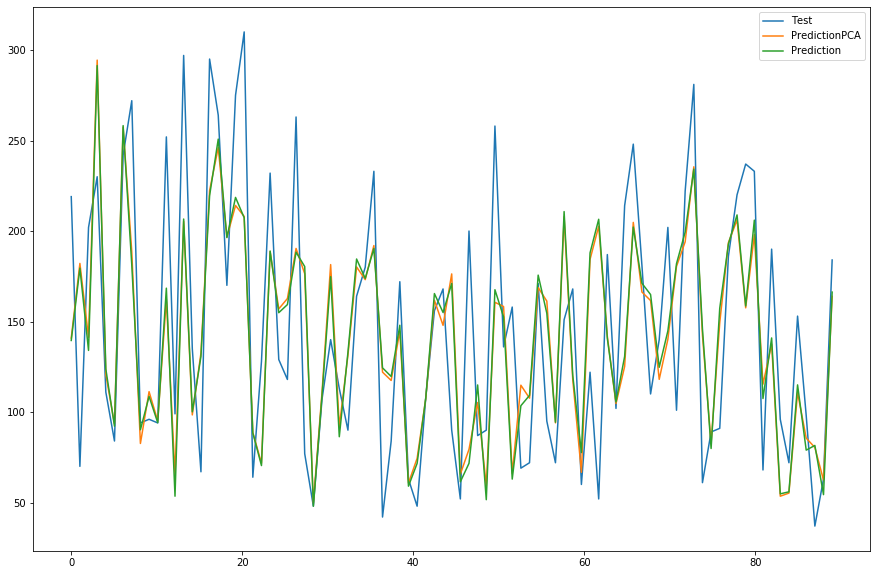

In [0]:
if __name__ == "__main__":

    # ----------- SKLEARN DATASET LOADING ------------ #
    # Load sklearn dataset
    # Classificazione: "iris", "digits", "wine", "breast_cancer "
    # Regressione: "diabetes", "boston", "linnerud"
    # 1. Select dataset 
    dataset_name = "diabetes"
    # 2. Create class object ScikitLearnDatasets 
    myScikitLearnDatasets=ScikitLearnDatasets(dataset_name)
    # 3. Print dataset information
    #myScikitLearnDatasets.printDatasetInformation()
    # 4. Get dataset data as numpy array X=input, Y=output and X_names=input_names, Y_names=output_names
    X,Y,X_names,Y_names = myScikitLearnDatasets.getXY()
    # 5. Convert numpy array data to Pandas Dataframe
    df_X,df_Y = createPandasDataFrame(X,Y,X_names,Y_names)
    print("#---------- DATASET INFORMATION ------------#")
    print("X Input or feature_names: ", X_names)
    print("Y Output or target_names: ", Y_names)
    print("Input X Shape: " , X.shape)
    print("Output Y Shape: " , Y.shape)
    print("Dataframe df_X Input Describe: \n", df_X.describe())
    print("Dataframe df_Y Output Describe: \n", df_Y.describe())
    print("#-------------------------------------------#")
    # 6. Write Pandas dataframe df_X, df_Y to csv file
    directory_path = os.path.join(os.getcwd(), "ScikitLearnDatasets")
    writeDataFrameToCsv(df_X,df_Y,directory_path, dataset_name)
    # ------------------------------------------------ #

    # ----------- READ DATASET FROM CSV -------------- #
    # Read previously saved dataset
    # 1. Read csv dataset (examvle boston_X.csv and boston_Y.csv) and transform to pandas daframe
    #dataset_name = "boston" # desired dataset name 
    #directory_path = os.path.join(os.getcwd(), "ScikitLearnDatasets") # dataset folder
    df_X,df_Y = readDataFrameFromCsv(directory_path, dataset_name)
    # ------------------------------------------------ #

    # -------- Split data into train and test -------- #
    # Split dataset into training and test set
    X_train, X_test, Y_train, Y_test = train_test_split(df_X.values, df_Y.values, test_size=0.20, random_state=42)
    # ------------------------------------------------ #

    # -------------------- PCA ----------------------- #
    # Principal component analysis (PCA) or dimensionality reduction
    # Number of input is reduced while keeping overall dataset information
    # 1. Covert numpy array to pandas dataframe
    df_X_train = pd.DataFrame(data = X_train , columns=df_X.keys())
    df_X_test = pd.DataFrame(data = X_test , columns=df_X.keys())
    # 2. Initialize PCA (Principal Component Analysis)
    n_components = 0.95 # 90% of the variance
    mydimensionalityReduction = dimensionalityReduction(n_components)
    # 3. Create PCA model (using input training data)
    pcaModel,information_array, total_information = mydimensionalityReduction.fit(df_X_train)
    print("#-------------- PCA ANALYSIS ---------------#")
    print("Information for each new component: ", information_array, "%")
    print("Total Information of the reduced dataset: ", total_information, " %")
    # 4. Apply created PCA model to both training and test dataset
    df_X_train_scaled = mydimensionalityReduction.transform(pcaModel,df_X_train)
    df_X_test_scaled = mydimensionalityReduction.transform(pcaModel,df_X_test)
    X_train_scaled = df_X_train_scaled.values
    X_test_scaled = df_X_test_scaled.values
    #print("Dataset X_train: ", X_train)
    #print("Dataset X_train Reduced: ", X_train_scaled)
    print("Number of inputs with PCA: ",X_train_scaled.shape[1])
    print("Number of inputs without PCA: ",X_train.shape[1])
    print("#-------------------------------------------#")
    # --------------------------------------------------#
    
    # -------- LINEAR REGRESSION WITH PCA DATA -------- #
    # we use reduce input data
    myModelPCA = LinearRegression()
    trained_modelPCA = myModelPCA.train(X_train_scaled, Y_train)
    Y_predPCA,R2_scorePCA, RMSE_scorePCA = myModelPCA.evaluate(X_test_scaled,Y_test,trained_modelPCA)
    print("#----- LINEAR REGRESSION PCA RESULTS -------#")
    print("w1,w2 .. wN : ",trained_modelPCA.coef_)
    print("w0 : ", trained_modelPCA.intercept_) 
    print("Score Linear Regression PCA: ", "R2 Score: ", R2_scorePCA, " RMSE Score: ", RMSE_scorePCA)
    print("#-------------------------------------------#")
    #myModelPCA.plot(Y_test,Y_pred)
    # ------------------------------------------------ #

    # -------------- LINEAR REGRESSOR ---------------- #
    # We use initial data 
    myModel = LinearRegression()
    trained_model = myModel.train(X_train, Y_train)
    Y_pred,R2_score, RMSE_score = myModel.evaluate(X_test,Y_test,trained_model)
    print("#------- LINEAR REGRESSION RESULTS ---------#")
    print("w1,w2 .. wN : ",trained_modelPCA.coef_)
    print("w0 : ", trained_modelPCA.intercept_) 
    print("Score Linear regression without PCA: ", "R2 Score: ", R2_score, " RMSE Score: ", RMSE_score)
    print("#-------------------------------------------#")
    #myModel.plot(Y_test,Y_pred)
    # ------------------------------------------------ #

    #----------------- COMPARISON -------------------- #    
    length = Y_pred.shape[0] # 20
    index_bar = np.linspace(0,length,length)
    plt.plot(index_bar, Y_test, label='Test')
    plt.plot(index_bar, Y_predPCA, label='PredictionPCA')
    plt.plot(index_bar, Y_pred, label='Prediction')
    plt.legend()
    plt.show()
    # ------------------------------------------------ #


# Referenze utili
* [PCA SPiegazione ed esempio](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)
* [Scikit-Learn Regressione](https://scikit-learn.org/stable/supervised_learning.html)
* [L'importanza di Standardizzare i dati](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)

# Extra : Come funzionano i dizionari in python 

In [0]:
#---------------------------------------------------------------------
#---------------- Trasformare dizionari in Array --------- -----------
#---------------------------------------------------------------------
# Usiamo Le funzioni
# Importare i datasets

from sklearn import datasets
import numpy as np

iris = datasets.load_iris() # Load iris dataset
digits = datasets.load_digits() # Load digits dataset
boston = datasets.load_boston() # Load boston dataset
diabetes = datasets.load_diabetes() # Load diabetes dataset
linnerud = datasets.load_linnerud() # Load linnerud dataset
wine = datasets.load_wine() # Load wine dataset
breast_cancer = datasets.load_breast_cancer() # Load breast_cancer dataset

dataset_scelto = iris

def approccio_1(dataset_scelto):
  # --------------------- Approccio 1
  # Get dictionar keys, value
  print(dataset_scelto.keys())
  list_keys = []
  list_values = []
  for key in dataset_scelto:
    list_keys.append(key)
    print(key)
    value = dataset_scelto[key]
    list_values.append(value)
  print("All keys inside array ", list_keys) 
  #print("All values inside array ", list_values) 

  # Convert list to numpy array
  print("----------------------------------")
  array_keys = np.asarray(list_keys)
  array_values = np.array(list_values)
  print(type(array_keys), array_keys.shape, array_keys[0].shape)
  print(type(array_values), array_values.shape,array_values[0].shape)

  # Going deeper inside data shape
  print("----------------------------------")
  for i in range(0,len(array_keys)):
    if isinstance(array_values[i],np.ndarray):
      print(array_keys[i], type(array_values[i]), array_values[i].shape )
    else:
      print(array_keys[i], type(array_values[i]))
    
  # Other Useful Solutions
  '''
  for value in diabetes.values():
    print(value) 

  for key, value in diabetes.items():
    print(key, value)
  '''

def approccio_2(dataset_scelto):
  #--------------------- Approccio 2
  # Convert a dictionary to an array of string
  list_keys = list(dataset_scelto.keys())
  list_values = list(dataset_scelto.values())
  #print(list_keys)
  print(type(list_keys))
  #print(list_values)
  print(type(list_values))
  # Convert list as numpy narray
  array_keys = np.asarray(list_keys)
  array_values = np.array(list_values)
  print(type(array_keys))
  print(type(array_values))
  # Covert back numpy ndarray to list
  new_list_keys = array_keys.tolist()
  new_list_values = array_values.tolist()
  print(type(new_list_keys))
  print(type(new_list_values))
  # Check if the list are equal
  if list_keys == new_list_keys and list_values==new_list_values: 
    print ("The lists are identical") 
  else : 
    print ("The lists are not identical")

print("-----------------------------")
print("-------- Approach 1 ---------")
print("-----------------------------")
approccio_1(dataset_scelto)
print("-----------------------------")
print("-------- Approach 2 ---------")
print("-----------------------------")
approccio_2(dataset_scelto)

-----------------------------
-------- Approach 1 ---------
-----------------------------
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
data
target
target_names
DESCR
feature_names
filename
All keys inside array  ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
----------------------------------
<class 'numpy.ndarray'> (6,) ()
<class 'numpy.ndarray'> (6,) (150, 4)
----------------------------------
data <class 'numpy.ndarray'> (150, 4)
target <class 'numpy.ndarray'> (150,)
target_names <class 'numpy.ndarray'> (3,)
DESCR <class 'str'>
feature_names <class 'list'>
filename <class 'str'>
-----------------------------
-------- Approach 2 ---------
-----------------------------
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>
The lists are identical
